In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(f'''No of rows: (df.shape[0]) No of Columns:{df.shape[1]}''')

No of rows: (df.shape[0]) No of Columns:5


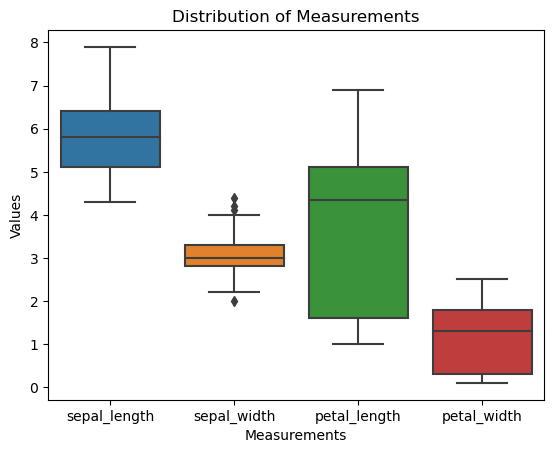

X Train: (120, 4)
X Test: (30, 4)
y Train: (120,)
y Test: (30,)


In [5]:
df1 = df.drop('species', axis=1)
melted_df = df1.melt(value_vars=df1.columns)
sns.boxplot(data=melted_df, x='variable', y='value')
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.title('Distribution of Measurements')
plt.show()
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print(f"X Train: {X_train.shape}\nX Test: {X_test.shape}\ny Train: {y_train.shape}\ny Test: {y_test.shape}")

In [6]:
preprocess = Pipeline([
    ('scaler', StandardScaler())])
model = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(multi_class='multinomial'))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

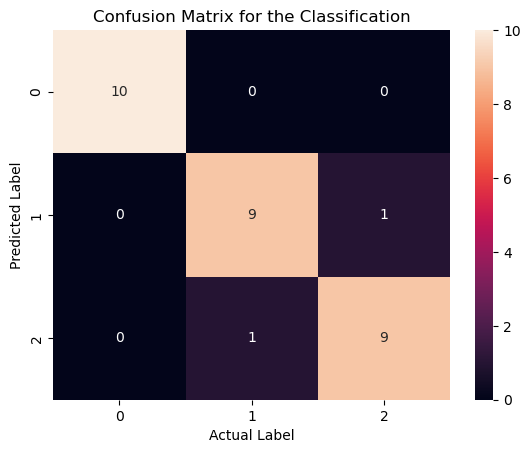

In [7]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for the Classification')
plt.show()

In [8]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [9]:
with open('model.pkl', 'wb') as fp: 
    pickle.dump(model,fp)